In [93]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:

wine = fetch_ucirepo(id=109) 
X = wine.data.features 
Y = wine.data.targets
DataSet = Y.join(X)

In [17]:
first_five = DataSet.head()
last_five = DataSet.tail()
pd.concat([first_five,last_five])

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560


In [18]:
# Получить информацию о DataFrame, включая количество ненулевых значений и типы данных
print(X.info())

# Подсчитать общее количество семплов и признаков
print("Количество семплов:", X.shape[0])
print("Количество признаков:", X.shape[1])

# Получить основные статистические характеристики числовых столбцов
print(X.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

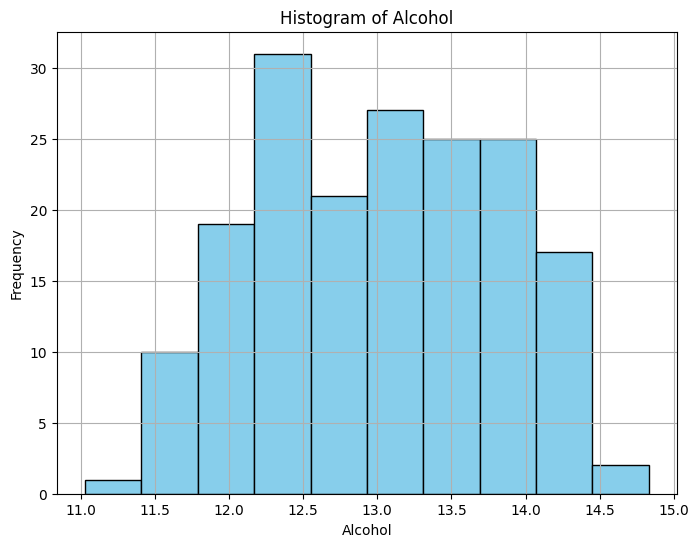

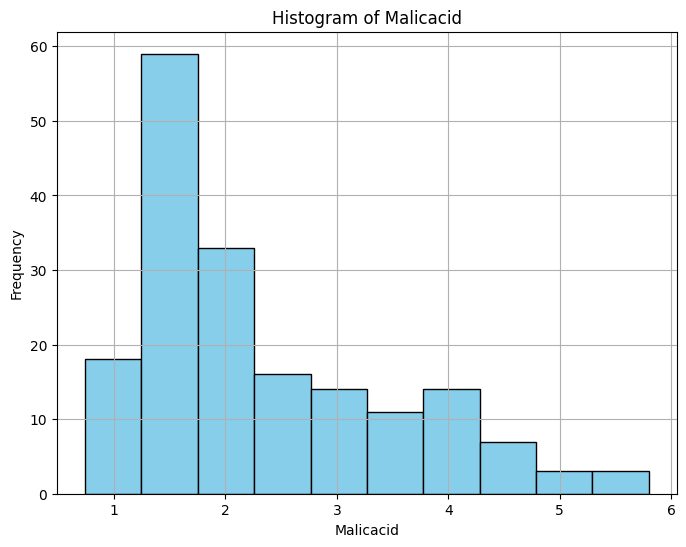

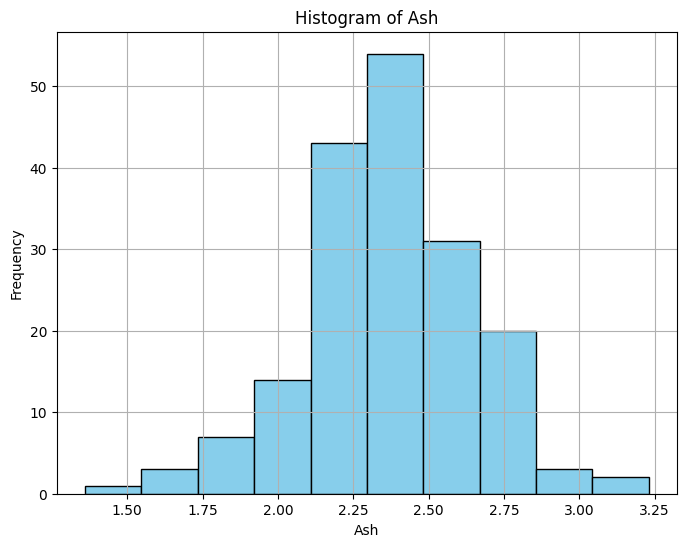

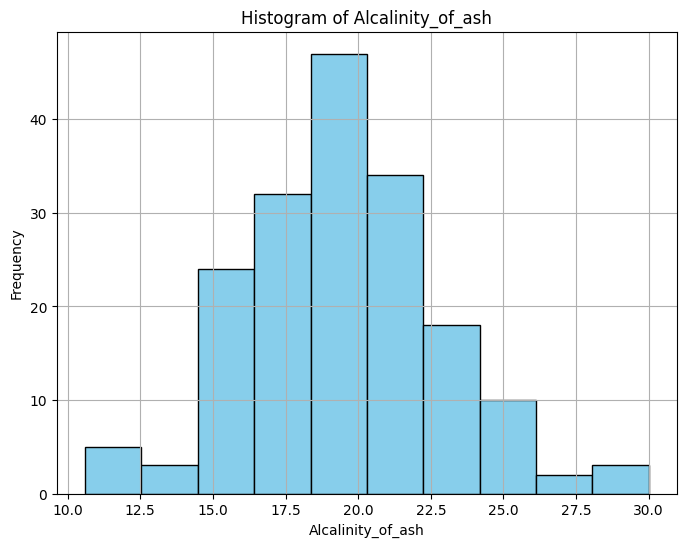

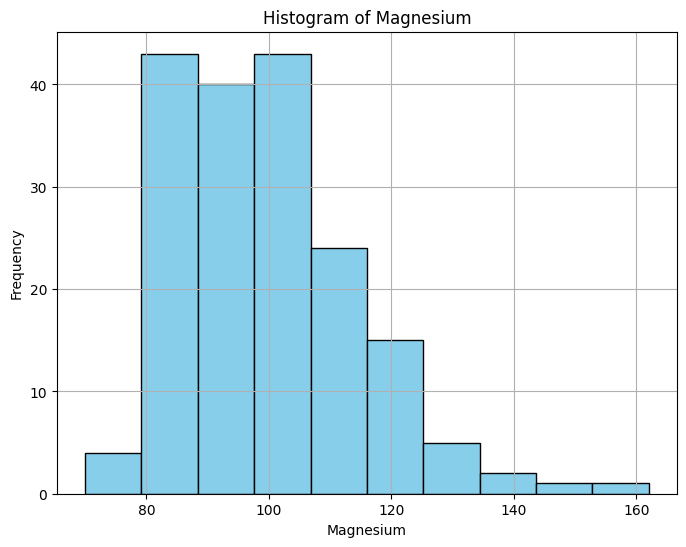

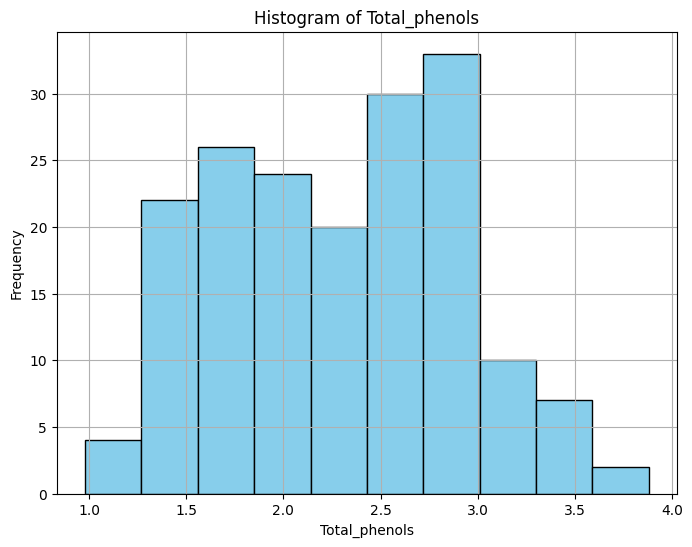

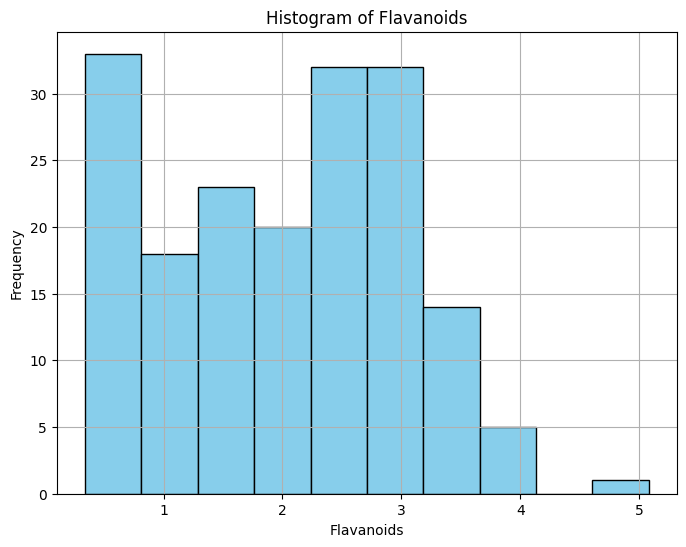

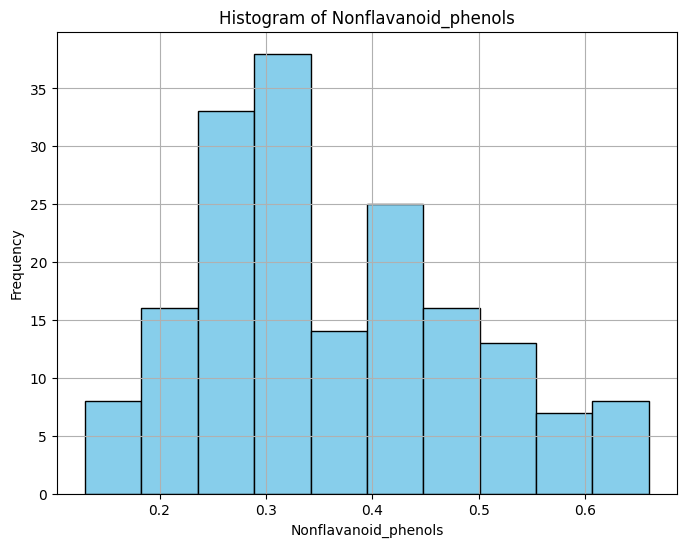

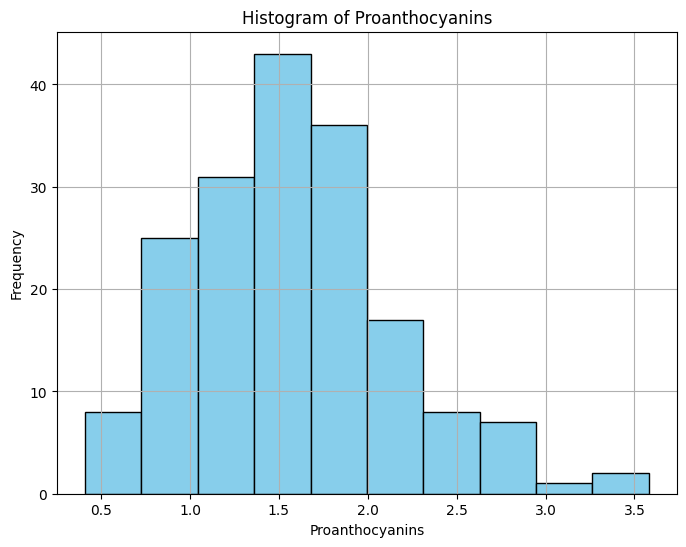

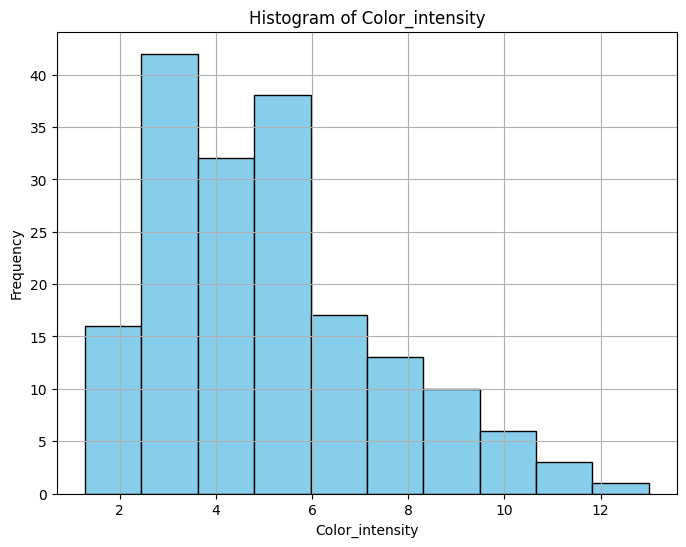

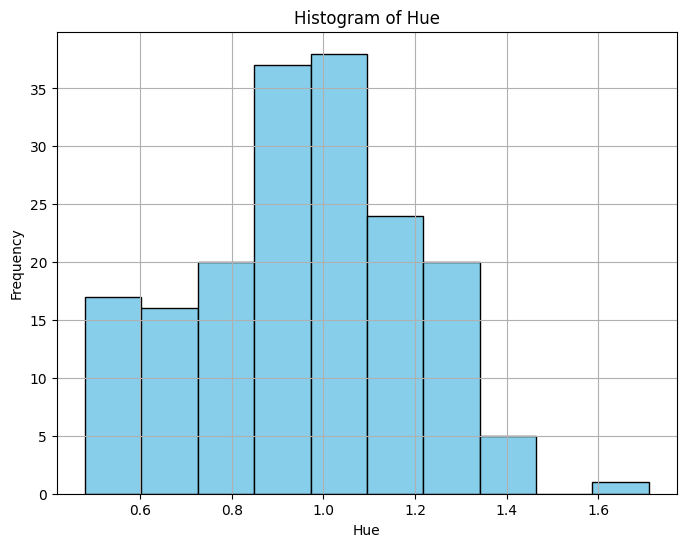

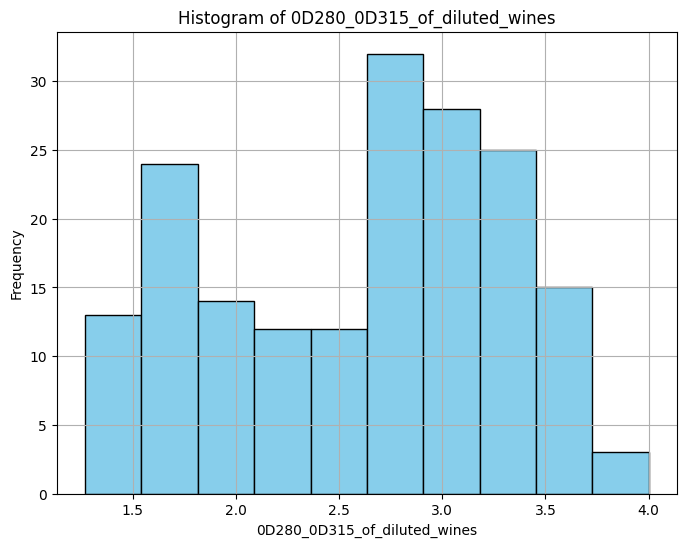

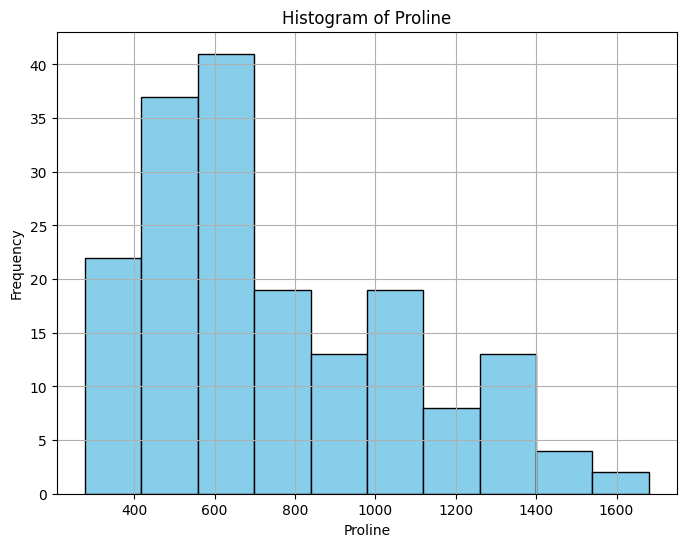

In [22]:
for column in X.columns:
    plt.figure(figsize=(8, 6))
    X[column].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
    plt.title('Histogram of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

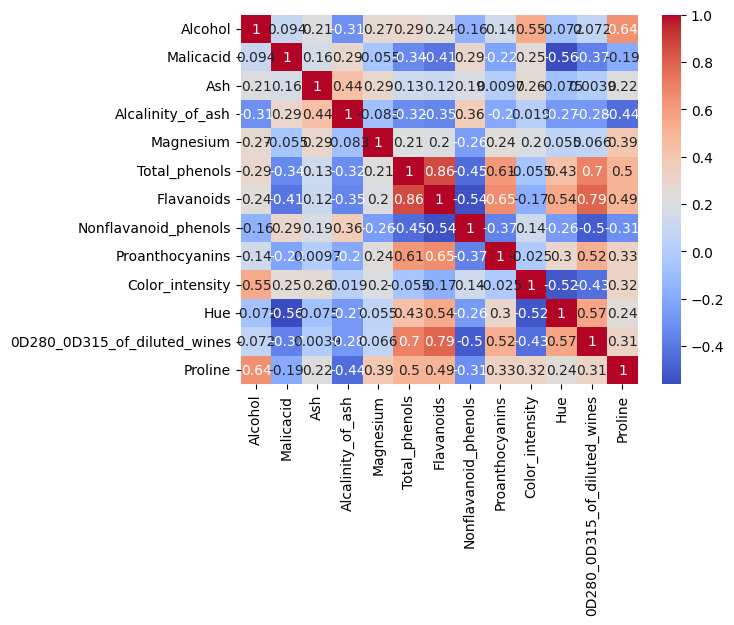

In [19]:
# Получить матрицу корреляции
correlation_matrix = X.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
max_value_index = abs(correlation_matrix.values).argmin()
max_value_index_label = correlation_matrix.index[max_value_index // correlation_matrix.shape[1]]
max_value_column_label = correlation_matrix.columns[max_value_index % correlation_matrix.shape[1]]

# Выводим найденные значения
print("Метка индекса для минимальной корреляции:", max_value_index_label)
print("Метка столбца для минимальной корреляции:", max_value_column_label)

Метка индекса для минимальной корреляции: Ash
Метка столбца для минимальной корреляции: 0D280_0D315_of_diluted_wines


In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


high_corr_features = ['Flavanoids', 'Total_phenols']
low_corr_features = ['Ash', '0D280_0D315_of_diluted_wines']

for item in [high_corr_features,low_corr_features]:
    X_train, X_test, y_train, y_test = train_test_split(X[item], Y, test_size=0.2, random_state=42)

    model = DecisionTreeClassifier(criterion='gini')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

Accuracy: 0.7222222222222222
Precision: 0.7504578754578755
Recall: 0.7261904761904763
F1 Score: 0.7358024691358024
Confusion Matrix:
[[10  4  0]
 [ 3 10  1]
 [ 0  2  6]]
Accuracy: 0.6944444444444444
Precision: 0.7238095238095238
Recall: 0.7023809523809524
F1 Score: 0.7116584564860426
Confusion Matrix:
[[10  4  0]
 [ 4  9  1]
 [ 0  2  6]]


In [78]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

svm_model = SVC(kernel='linear', decision_function_shape='ovr', probability=True)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

Accuracy: 0.7222222222222222
Precision: 0.7621452621452622
Recall: 0.7261904761904763
F1 Score: 0.7358333333333333


C:\Users\Rat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


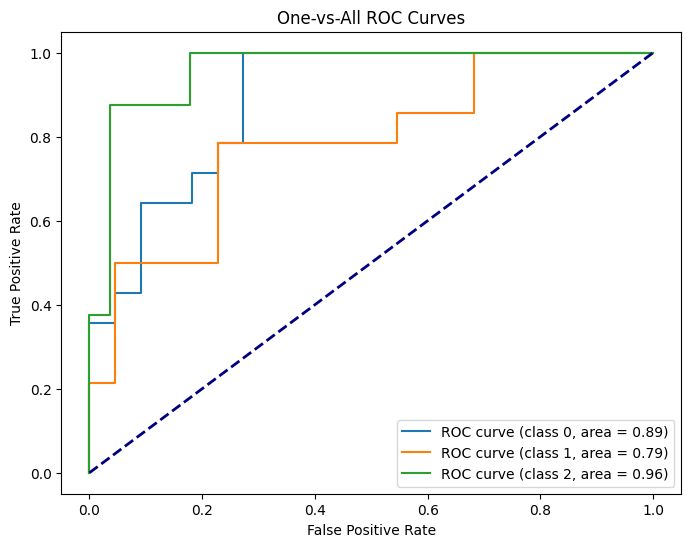

In [84]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = svm_model.decision_function(X_test)
y_prob = svm_model.predict_proba(X_test)

# Для каждого класса строим ROC-кривую
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test, y_score[:, i], pos_label=svm_model.classes_[i])
    # fpr, tpr, _ = roc_curve(y_test, y_prob[:, i], pos_label=svm_model.classes_[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-All ROC Curves')
plt.legend(loc='lower right')
plt.show()